# 5주차 데이터 전처리

# Imputation of missing values

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Univariate feature imputation

In [5]:
import numpy as np
import pandas as pd

<font color='red'> <b>(1) Choose a class (Class = API = SimpleImputer)<b>

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
type(SimpleImputer())

sklearn.impute._base.SimpleImputer

<font color='red'> <b> (2) Choose a class with desired values (Instantiating the class with hyperparameter--> 
mean)<b>

In [10]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 100)
imp = SimpleImputer(missing_values=np.nan, strategy='constant') # default fill_value =0

In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

<font color='red'> <b> (3) Arrange data into a features matrix (and target vector)<b>

In [12]:
X = [[1, 2], [np.nan, 3], [7, 6]]
X
pd.DataFrame(X)

[[1, 2], [nan, 3], [7, 6]]

,0,1
0,1.0,2
1,NaN,3
2,7.0,6


<font color='red'> <b> (4) Fit the class to your data(X) by calling the fit() method of the fit instance.<b>

In [28]:
SimpleImputer(missing_values=np.nan, strategy='mean').fit(X)

SimpleImputer()

<font color='red'> <b>(5) Apply the class to old(or new) data<b>

In [14]:
SimpleImputer(missing_values=np.nan, strategy='mean').transform(X)
pd.DataFrame(imp.transform(pd.DataFrame(X)))

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

,0,1
0,1.0,2.0
1,4.0,3.0
2,7.0,6.0


In [15]:
imp.fit_transform(X)

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

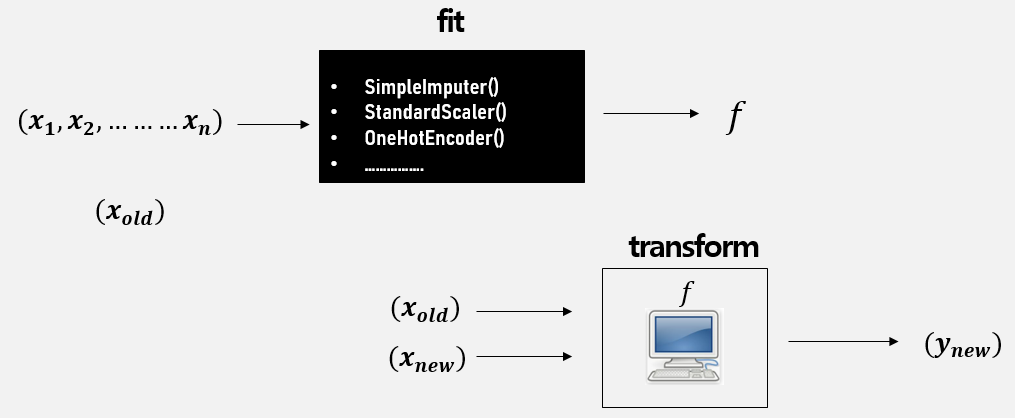

In [1]:
from IPython.display import Image
Image(filename='../image/week05.png')

### <font color = 'green'> 과거 데이터의 fit한 값 평균 '4(=mean(1,7))'와, '3.6666(=mean(2,3,6))'을 unseen data의 컬럼에 imputation한다

In [19]:
X = [[np.nan, 2], [6, np.nan], [100, 50]]
pd.DataFrame(X)

,0,1
0,NaN,2.0
1,6.0,NaN
2,100.0,50.0


In [20]:
pd.DataFrame(imp.transform(pd.DataFrame(X)))

,0,1
0,4.0,2.000000
1,6.0,3.666667
2,100.0,50.000000


### <font color = 'green'> unseen 데이터의 fit한 값 평균을 컬럼에 imputation한다

In [21]:
imp.fit(X)

pd.DataFrame(X)
pd.DataFrame(imp.transform(pd.DataFrame(X)))

SimpleImputer()

,0,1
0,NaN,2.0
1,6.0,NaN
2,100.0,50.0


,0,1
0,53.0,2.0
1,6.0,26.0
2,100.0,50.0


In [22]:
df = pd.DataFrame([["a", "x"],
                   [np.nan, "y"],
                   ["a", np.nan],
                   ["b", "y"]], dtype="category")
df

,0,1
0,a,x
1,NaN,y
2,a,NaN
3,b,y


In [23]:
imp = SimpleImputer(strategy="most_frequent")

In [24]:
pd.DataFrame(imp.fit_transform(df))

,0,1
0,a,x
1,a,y
2,a,y
3,b,y


### 2. Multivariate feature imputation under Beta version

### 3. Nearest neighbors imputation

In [40]:
from sklearn.impute import KNNImputer
nan = np.nan
X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]
pd.DataFrame(X)

,0,1,2
0,1.0,2,NaN
1,3.0,4,3.0
2,NaN,6,5.0
3,8.0,8,7.0


### 가장 가까운 2개의 instance의 평균값 (3+8)/2, (3+5)/2

In [20]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
pd.DataFrame(imputer.fit_transform(X))

,0,1,2
0,1.0,2.0,4.0
1,3.0,4.0,3.0
2,5.5,6.0,5.0
3,8.0,8.0,7.0


### 4. Marking imputed values

In [25]:
from sklearn.impute import MissingIndicator
X = np.array([[-1, -1, 1, 3],
              [4, -1, 0, -1],
              [8, -1, 1, 0]])
pd.DataFrame(X)

,0,1,2,3
0,-1,-1,1,3
1,4,-1,0,-1
2,8,-1,1,0


### '-1'를 결측치로 특정하여 참 거짓으로 표시

In [27]:
indicator = MissingIndicator(missing_values=8)
mask_missing_values_only = indicator.fit_transform(X)
mask_missing_values_only

indicator.features_

array([[False],
       [False],
       [ True]])

array([0], dtype=int64)

In [46]:
indicator = MissingIndicator(missing_values=-1, features="all")
mask_all = indicator.fit_transform(X)
mask_all

indicator.features_

array([[ True,  True, False, False],
       [False,  True, False,  True],
       [False,  True, False, False]])

array([0, 1, 2, 3])

In [50]:
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.tree import DecisionTreeClassifier
X, y = load_iris(return_X_y=True)
X[0:10]
y

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

X.shape, (150,4) 0과 1사이에서 4개의 변수별로 150 instance의 무작위 값을 생성

In [54]:
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
mask[0:10]

array([[ True, False, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True],
       [ True,  True,  True, False],
       [ True,  True, False,  True],
       [ True,  True,  True,  True],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [False, False,  True, False]])

In [57]:
X[mask] = np.nan
X[0:10]

array([[nan, 3.5, 1.4, 0.2],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, 1.5, nan],
       [nan, nan, nan, 0.2],
       [nan, nan, 1.7, nan],
       [nan, nan, nan, nan],
       [nan, 3.4, nan, 0.2],
       [nan, 2.9, nan, 0.2],
       [4.9, 3.1, nan, 0.1]])

In [58]:
X_train, X_test, y_train, _ = train_test_split(X, y, test_size=100,
                                               random_state=0)

In [59]:
X_train[0:10]

array([[nan, 3. , 1.3, 0.2],
       [nan, nan, 1.7, nan],
       [nan, nan, 4. , nan],
       [6.8, nan, 5.9, nan],
       [nan, 3. , 6.6, 2.1],
       [nan, 3.5, 1.4, 0.2],
       [nan, 3.1, nan, 0.2],
       [5.2, 3.4, 1.4, nan],
       [nan, nan, nan, 1.3],
       [6.6, nan, nan, nan]])

In [60]:
pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X_train[0:10]))

,0,1,2,3
0,6.2,3.0,1.300000,0.2
1,6.2,3.2,1.700000,0.8
2,6.2,3.2,4.000000,0.8
3,6.8,3.2,5.900000,0.8
4,6.2,3.0,6.600000,2.1
5,6.2,3.5,1.400000,0.2
6,6.2,3.1,3.185714,0.2
7,5.2,3.4,1.400000,0.8
8,6.2,3.2,3.185714,1.3
9,6.6,3.2,3.185714,0.8


### FeatureUnion은 SimpleImputer(strategy='mean'), MissingIndicator()  두 건의 데이터변환 과정을 합쳐 놓은 것임 순서가 바뀌어도 상관없음

In [206]:
transformer = FeatureUnion(
    transformer_list=[
        ('features', SimpleImputer(strategy='mean')),
        ('indicators', MissingIndicator())])
transformer = transformer.fit(X_train, y_train)
results = transformer.transform(X_test)
results.shape

(100, 8)

### 컬럼 0 ~ 3은 평균값으로 결측치를 대체한 결과이고 4 ~ 7은 결측치가 있으면 '1'의 결과 ---> Feature Union

In [207]:
pd.DataFrame(transformer.transform(X_train))[0:10]

,0,1,2,3,4,5,6,7
0,6.058065,3.000000,4.02963,0.200000,1.0,0.0,1.0,0.0
1,6.058065,2.952941,1.70000,0.400000,1.0,1.0,0.0,0.0
2,5.500000,2.300000,4.00000,1.300000,0.0,0.0,0.0,0.0
3,6.800000,3.200000,4.02963,1.056667,0.0,0.0,1.0,1.0
4,7.600000,2.952941,6.60000,2.100000,0.0,1.0,0.0,0.0
5,6.058065,2.952941,4.02963,0.200000,1.0,1.0,1.0,0.0
6,4.900000,3.100000,4.02963,1.056667,0.0,0.0,1.0,1.0
7,5.200000,2.952941,4.02963,0.200000,0.0,1.0,1.0,0.0
8,6.058065,2.952941,4.50000,1.300000,1.0,1.0,0.0,0.0
9,6.600000,2.952941,4.40000,1.056667,0.0,1.0,0.0,1.0


In [178]:
clf = make_pipeline(transformer, DecisionTreeClassifier())
clf = clf.fit(X_train, y_train)
results = clf.predict(X_test)
results.shape
results

(100,)

array([2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0])

# End